In [79]:
import numpy          # linear algebra
import urllib         # load data from the web
import scipy.optimize # optimization routines
import random         # random number generation
import matplotlib
import pandas as pd

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Instructions
You will need the following files:
Amazon Gift Card data : https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Gift_Card_v1_00.tsv.gz 
The above is a TSV formatted dataset, including reviews from one of the smaller Amazon categories. 
Data can be read using the Python csv.reader library.

In [63]:
# load the data
import gzip
path = 'amazon_reviews_us_Gift_Card_v1_00.tsv.gz'
f = gzip.open(path, 'rt', encoding="utf8")

In [64]:
dataset = []
# Read the header:
header = f.readline().strip().split('\t')
for line in f:
    # Separate by tabs
    line = line.split('\t')
    # Convert to key-value pairs
    d = dict(zip(header, line))
    # Convert strings to integers for some fields:
    d['star_rating'] = int(d['star_rating'])
    d['helpful_votes'] = int(d['helpful_votes'])
    d['total_votes'] = int(d['total_votes'])
    dataset.append(d)

### Regression - Week 1
First, let’s see how ratings can be predicted as a function of 
(a) whether a review is a ‘verified purchase’, and
(b) the length of the review (in characters)

1. What is the distribution of ratings in the dataset? That is, how many 1-star, 2-star, 3-star (etc.) reviews
are there? You may write out the values or include a simple plot (1 mark).

In [65]:
df = pd.DataFrame(dataset)
df['verified_purchase'] = df['verified_purchase'].apply(lambda x: 1 if x == 'Y' else 0) # change to int

1      4793
2      1569
3      3156
4      9859
5    129709
Name: star_rating, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


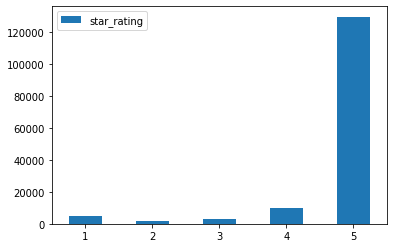

In [66]:
dist = df['star_rating'].value_counts().sort_index()
print(dist);
print(pd.DataFrame(dist).plot.bar(rot=0));

2. (CSE158 only) Repeat the above question, but generate the distribution (a) only for reviews that are
‘verified,’ and (b) only for reviews that are not verified. Write out the values or generate a plot to show
the difference between these distributions (1 mark).

In [67]:
df.columns

Index(['customer_id', 'helpful_votes', 'marketplace', 'product_category',
       'product_id', 'product_parent', 'product_title', 'review_body',
       'review_date', 'review_headline', 'review_id', 'star_rating',
       'total_votes', 'verified_purchase', 'vine'],
      dtype='object')

In [68]:
df.head(2)

,customer_id,helpful_votes,marketplace,product_category,product_id,product_parent,product_title,review_body,review_date,review_headline,review_id,star_rating,total_votes,verified_purchase,vine
0,24371595,0,US,Gift Card,B004LLIL5A,346014806,Amazon eGift Card - Celebrate,Great birthday gift for a young adult.,2015-08-31\n,Five Stars,R27ZP1F1CD0C3Y,5,0,1,N
1,42489718,0,US,Gift Card,B004LLIKVU,473048287,Amazon.com eGift Cards,It's an Amazon gift card and with over 9823983...,2015-08-31\n,Gift card for the greatest selection of items ...,RJ7RSBCHUDNNE,5,0,1,N


1      4000
2      1344
3      2784
4      8940
5    118974
Name: star_rating, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


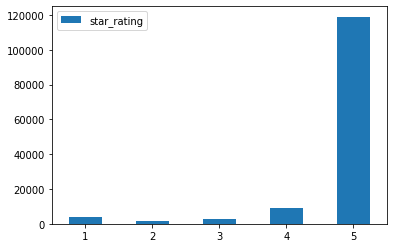

In [70]:
dist_verified = df[df['verified_purchase'] == 1]['star_rating'].value_counts().sort_index()
print(dist_verified);
print(pd.DataFrame(dist_verified).plot.bar(rot=0));

3. Train a simple predictor to predict the star rating using two features:
<img src="fig1.png" style="height:50px"> 

Report the values of θ0, θ1, and θ2. Briefly describe your interpretation of these values, i.e., what do θ0,
θ1, and θ2 represent? Explain these in terms of the features and labels, e.g. if the coefficient of ‘review
length’ is negative, what would that say about positive versus negative reviews (1 mark)?

* Our feature matrix, X, will be contain the 2 columns of the df with values 'review is verified' and 'review length'
    * review length needs to be added to the df
* θ0 is the y- intercept of the regression line and θ1 & θ2 are slopes coefficients for 'review is verified' and 'review length' respectively. 

In [71]:
df['review_length'] = [len(x) for x in df['review_body']] # review header is included in the length calculation

In [78]:
X = df[['verified_purchase', 'review_length']]
y = df['star_rating']

In [84]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y);

In [85]:
# regression coefficients
model.coef_

array([ 0.05041483, -0.0012466 ])

Our linear regression model calcualted θ1 = 0.05041483 (representing the coefficient for 'review is verified') and our θ2 = -0.0012466 (representing the coefficient for 'review length'). This tells us  

In [86]:
model.intercept_

4.844618169673417

4. Train another predictor that only uses one feature:
    <img src="fig2.png" style="height:50px"> 

Report the values of θ0 and θ1. Note that coefficient you found here might be quite different (i.e., much
larger or smaller) than the one from Question 3, even though these coefficients refer to the same feature.
Provide an explanation as to why these coefficients might vary so significantly (1 mark).1

5. Split the data into two fractions – the first 90% for training, and the remaining 10% testing (based on
the order they appear in the file). Train the same model as in Question 4 on the training set only. What
is the model’s MSE on the training and on the test set (1 mark)?

6. (CSE158 only) Using the test set from Question 5, report the Mean Absolute Error (MAE) and R2
coefficient for your predictor (on the test set) (1 mark).

### Classification - Week 2

In this question we’ll alter the prediction from our regression task, so that we are now classifying whether a
review is verified. Continue using the 90%/10% training and test sets you constructed previously, i.e., train on
the training set and report the error/accuracy on the testing set.

8. First, let’s train a predictor that estimates whether a review is verified using the rating and the length:
        <img src="fig3.png" style="height:50px"> 

Train a logistic regressor to make the above prediction (you may use a logistic regression library with de-
fault parameters, e.g. linear model.LogisticRegression() from sklearn). Report the classification accuracy of this predictor. Report also the proportion of labels that are positive (i.e., the proportion of reviews
that are verified) and the proportion of predictions that are positive (1 mark).

9. Considering same prediction problem as above, can you come up with a more accurate predictor (e.g. using
features from the text, timestamp, etc.)? Write down the feature vector you design, and report its
train/test accuracy (1 mark).